In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
movies=pd.read_csv("C:\\Users\\Factory\\Desktop\\Association Rules\\my_movies.csv",sep=",")

In [3]:
movies = movies.iloc[:,[0,1,2,3,4]]

In [5]:
movies.head(5)

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN


In [6]:
movies.iloc[:,2:5] = movies.iloc[:,2:5].apply(lambda x:x.fillna(0))

In [7]:
movies.head(5)

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,0,0
2,LOTR1,LOTR2,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0
4,Gladiator,Patriot,Sixth Sense,0,0


In [8]:
X = pd.get_dummies(movies[['V1','V2','V3','V4','V5']])

In [9]:
X

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_0,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_0,V4_Green Mile,V5_0,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
6,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
7,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
9,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0


In [10]:
x_dummies = X.iloc[:,[9,14,16]]

In [11]:
frequent_items = apriori(x_dummies,min_support = 0.005, max_len =2 , use_colnames = True )
frequent_items.sort_values('support', ascending = False, inplace = True)

In [12]:
rules_dummies = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules_dummies.sort_values('lift',ascending =False,inplace =True)

In [13]:
def to_list(i):
    return(sorted(i))

In [14]:
rules_add = rules_dummies.antecedents.apply(to_list) + rules_dummies.consequents.apply(to_list)

In [15]:
rules_add = rules_add.apply(sorted)

In [16]:
rules_set = list(rules_add)

In [17]:
unique_rules = [list(m) for m in set(tuple(i) for i in rules_set)]
index_rules = []
for i in unique_rules:
    index_rules.append(rules_set.index(i))

In [18]:
rules_without_redud = rules_dummies.iloc[index_rules,:]

In [19]:
rules_without_redud.sort_values('lift', ascending = False, inplace =True)

<ipython-input-19-5f8de91fab1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_redud.sort_values('lift', ascending = False, inplace =True)


In [20]:
Support = rules_without_redud['support']
confidence = rules_without_redud['confidence']

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Confidence')

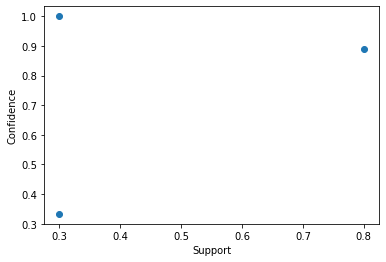

In [22]:
plt.scatter(Support,confidence);plt.xlabel("Support");plt.ylabel("Confidence")

In [23]:
x_without_dum = X.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,15,17]]

In [24]:
frequents_item1 = apriori(x_without_dum, min_support=0.005, max_len = 2, use_colnames=True)
frequents_item1.sort_values('support',ascending = False, inplace = True)

In [25]:
rules_without = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules_without.sort_values('lift',ascending =False,inplace =True)

In [26]:
def to_list_out(i):
    return(sorted(i))

In [27]:
rules_out_add = rules_without.antecedents.apply(to_list_out)+rules_without.consequents.apply(to_list_out)

In [28]:
rules_out_add = rules_out_add.apply(sorted)
rules_set_out = list(rules_out_add)

In [29]:
unique_values_out = [list(n) for n in set(tuple(i) for i in rules_set_out)]
index_rules_out=[]
for i in unique_values_out:
    index_rules_out.append(rules_set_out.index(i))

In [30]:
rules_without_out = rules_without.iloc[index_rules_out,:]

In [31]:
rules_without_out.sort_values('lift', ascending= False, inplace =True)

<ipython-input-31-b490221beebe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_out.sort_values('lift', ascending= False, inplace =True)


In [32]:
Support_out = rules_without_out["support"]
Confidence_out = rules_without_out["confidence"]
lift = rules_without_out["lift"]

In [33]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'lift')

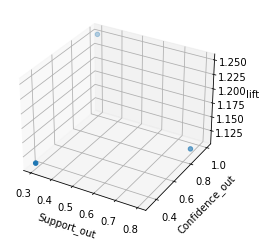

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(Support_out, Confidence_out, lift)
ax.set_xlabel("Support_out")
ax.set_ylabel("Confidence_out")
ax.set_zlabel("lift")

In [35]:
import matplotlib.pyplot as plt
import scipy as sp

Text(0, 0.5, 'Confidence')

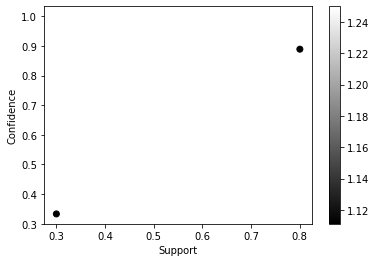

In [36]:
plt.scatter(Support_out, Confidence_out,c= lift,cmap='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("Confidence")

In [39]:
data_dummies = pd.read_csv("C:\\Users\\Factory\\Desktop\\Association Rules\\my_movies.csv")
data_dummies = data_dummies.iloc[:,5:]

In [40]:
frequent_ori = apriori(data_dummies, min_support = 0.005, max_len=2, use_colnames = True)
frequent_ori.sort_values('support',ascending =False , inplace =True)

In [41]:
rules_ori = association_rules(frequent_ori, metric= 'lift', min_threshold =1)
rules_ori.sort_values('lift', ascending =False, inplace =True)

In [43]:
def to_list_ori(i):
    return(sorted(i))

In [44]:
ori_add = rules_ori.antecedents.apply(to_list_ori) + rules_ori.consequents.apply(to_list_ori)

In [45]:
ori_add = ori_add.apply(sorted)

In [46]:
ori_set = list(ori_add)
unique_ori = [list(m) for m in set(tuple(i) for i in ori_set)]

In [47]:
index_ori = []
for i in unique_ori:
    index_ori.append(ori_set.index(i))

In [48]:
rules_without_ori = rules_ori.iloc[index_ori,:]

In [49]:
rules_without_ori.sort_values('lift', ascending = False, inplace = True)

<ipython-input-49-224577b85325>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_ori.sort_values('lift', ascending = False, inplace = True)


In [50]:
Support_ori = rules_without_ori["support"]
confidence_ori = rules_without_ori["confidence"]
lift_ori = rules_without_ori["lift"]

Text(0.5, 0, 'lift')

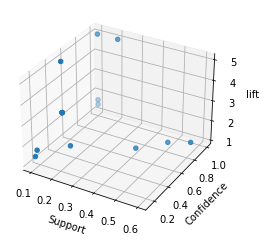

In [52]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(Support_ori,confidence_ori,lift_ori)
ax1.set_xlabel("Support")
ax1.set_ylabel("Confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

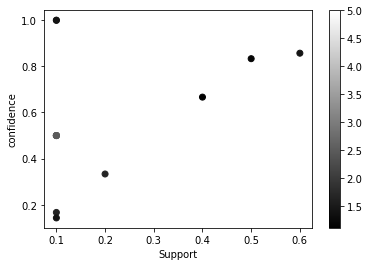

In [53]:
plt.scatter(Support_ori,confidence_ori, c =lift_ori, cmap ='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("confidence")

In [54]:
## Model with other than Zero values and  model with the dummy variables given in the data set itself are giving two different values
##Considering the model with the dummy variables given in the data set itself are giving two different values